In [1]:
import pandas as pd
import requests
import json
import pprint
import matplotlib.pyplot as plt

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
response = requests.get('https://catalog.data.gov/api/3/action/package_show?id=traffic-crashes-crashes')

In [3]:
response_dict = json.loads(response.content)

In [4]:
assert response_dict['success'] is True

In [5]:
data = response_dict['result']

In [6]:
pprint.pprint(data)

{'author': None,
 'author_email': None,
 'creator_user_id': '2b785922-9f13-491b-a3c2-2a40acbd80c2',
 'extras': [{'key': 'resource-type', 'value': 'Dataset'},
            {'key': 'source_hash',
             'value': 'e7915d992f4371b776ae8d3f5c892e6ba91411fac2f0314050b447410a222b5f'},
            {'key': 'source_datajson_identifier', 'value': True},
            {'key': 'source_schema_version', 'value': '1.1'},
            {'key': 'accessLevel', 'value': 'public'},
            {'key': 'identifier',
             'value': 'https://data.cityofchicago.org/api/views/85ca-t3if'},
            {'key': 'issued', 'value': '2023-07-27'},
            {'key': 'landingPage',
             'value': 'https://data.cityofchicago.org/d/85ca-t3if'},
            {'key': 'modified', 'value': '2024-04-05'},
            {'key': 'publisher', 'value': 'data.cityofchicago.org'},
            {'key': 'theme', 'value': ['Transportation']},
            {'key': 'catalog_@context',
             'value': 'https://project-o

In [7]:
data_url = data['resources'][0]['url']
data_format = data['resources'][0]['format']
print('Data format:  ' + data_format)
print(data_url)
csv = ['comma-separated-values', 'CSV', 'csv']

Data format:  CSV
https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD


In [8]:
df = pd.read_csv(data_url)

C:\Users\shahj\AppData\Local\Temp\ipykernel_11096\2442137398.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [9]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

## Data Cleaning

In [10]:
df_new = df.drop(columns=['CRASH_DATE_EST_I','REPORT_TYPE','LANE_CNT','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','DATE_POLICE_NOTIFIED', 'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','LATITUDE','LONGITUDE','LOCATION'])

In [11]:
df_new.isnull().sum()

CRASH_RECORD_ID                     0
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
TRAFFIC_CONTROL_DEVICE              0
DEVICE_CONDITION                    0
WEATHER_CONDITION                   0
LIGHTING_CONDITION                  0
FIRST_CRASH_TYPE                    0
TRAFFICWAY_TYPE                     0
ALIGNMENT                           0
ROADWAY_SURFACE_COND                0
ROAD_DEFECT                         0
CRASH_TYPE                          0
DAMAGE                              0
PRIM_CONTRIBUTORY_CAUSE             0
SEC_CONTRIBUTORY_CAUSE              0
STREET_NO                           0
STREET_DIRECTION                    4
STREET_NAME                         1
NUM_UNITS                           0
MOST_SEVERE_INJURY               1803
INJURIES_TOTAL                   1791
INJURIES_FATAL                   1791
INJURIES_INCAPACITATING          1791
INJURIES_NON_INCAPACITATING      1791
INJURIES_REPORTED_NOT_EVIDENT    1791
INJURIES_NO_

In [12]:
df_new = df_new[~df_new['MOST_SEVERE_INJURY'].isnull()]
df_new['CRASH_DATE'] = pd.to_datetime(df_new['CRASH_DATE'])


In [13]:
df_new.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 4
STREET_NAME                      1
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN                 0
CRASH_HOUR          

In [14]:
 df_new['STREET_DIRECTION'].fillna('N',inplace= True)

In [15]:
 df_new['STREET_NAME'].fillna('UNKNOWN',inplace= True)

In [16]:
df_new.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN                 0
CRASH_HOUR          

In [17]:
df_new['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              600790
INJURY AND / OR TOW DUE TO CRASH    218576
Name: CRASH_TYPE, dtype: int64

In [18]:
df_new['CRASH_TYPE'].replace({'NO INJURY / DRIVE AWAY':0,'INJURY AND / OR TOW DUE TO CRASH':1},inplace = True)


In [19]:
df_new.dtypes

CRASH_RECORD_ID                          object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
CRASH_TYPE                                int64
DAMAGE                                   object
PRIM_CONTRIBUTORY_CAUSE                  object
SEC_CONTRIBUTORY_CAUSE                   object
STREET_NO                                 int64
STREET_DIRECTION                         object
STREET_NAME                              object
NUM_UNITS                                 int64
MOST_SEVERE_INJURY                      

In [20]:
numerical_columns = df_new.select_dtypes(include=['int64', 'float64']).columns


numerical_df = df_new[numerical_columns]

In [21]:
numerical_df

,POSTED_SPEED_LIMIT,CRASH_TYPE,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,30,1,5500,2,3.0,0.0,1.0,2.0,0.0,2.0,0.0,19,3,9
1,50,0,7900,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,9
2,30,0,2101,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7
3,30,0,10020,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8
4,15,1,700,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821164,35,0,3200,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,4,3
821165,25,1,12701,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,14,4,3
821166,30,0,2513,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,4,3
821167,15,0,1515,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17,4,5


In [22]:
X = numerical_df
Y = numerical_df['CRASH_TYPE']
X.shape, Y.shape

((819366, 14), (819366,))

In [23]:
X.drop(columns =['CRASH_TYPE'], inplace = True)

C:\Users\shahj\AppData\Local\Temp\ipykernel_11096\2464638452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns =['CRASH_TYPE'], inplace = True)


In [24]:
## Importing necessary libraries..
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
def GNB_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    print("Successfully model fitted!!!")
    
    print("------------Training Prediction--------------")
    y_preds = gnb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")
    
    cf_matrix = confusion_matrix(y_train, y_preds)
    
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = gnb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    
    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92    480954
           1       0.98      0.54      0.69    174538

    accuracy                           0.87    655492
   macro avg       0.92      0.77      0.81    655492
weighted avg       0.89      0.87      0.86    655492



Accuracy Score:

87.371318%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92    119836
           1       0.98      0.54      0.70     44038

    accuracy                           0.87    163874
   macro avg       0.92      0.77      0.81    163874
weighted avg       0.89      0.87      0.86    163874



Accuracy Score:

87.390922%



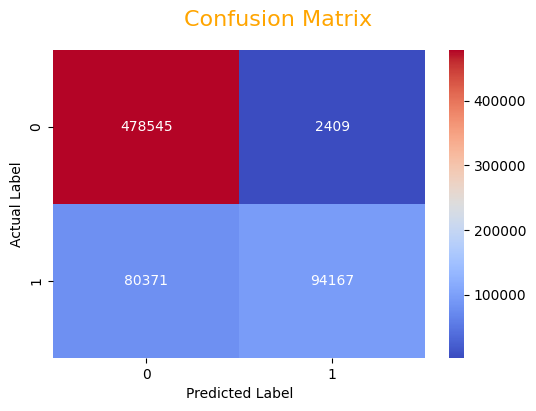

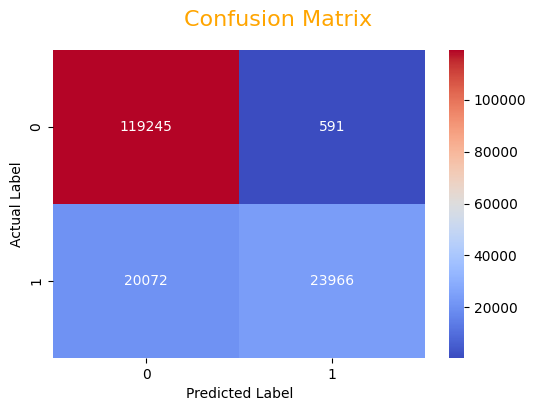

In [26]:
GNB_model(X, Y)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
def DT_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = dt.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = dt.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    480954
           1       1.00      0.98      0.99    174538

    accuracy                           0.99    655492
   macro avg       1.00      0.99      0.99    655492
weighted avg       0.99      0.99      0.99    655492



Accuracy Score:

99.468643%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.87      0.86      0.86    119836
           1       0.63      0.65      0.64     44038

    accuracy                           0.80    163874
   macro avg       0.75      0.75      0.75    163874
weighted avg       0.81      0.80      0.80    163874



Accuracy Score:

80.357470%



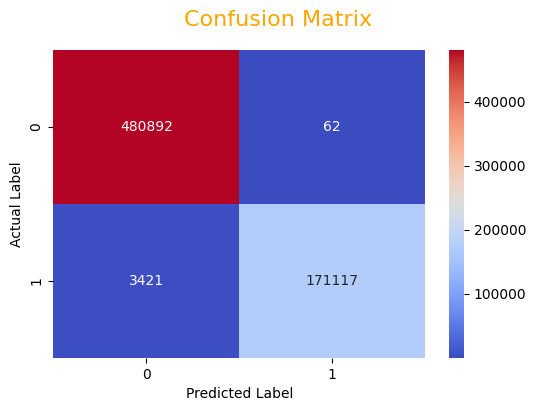

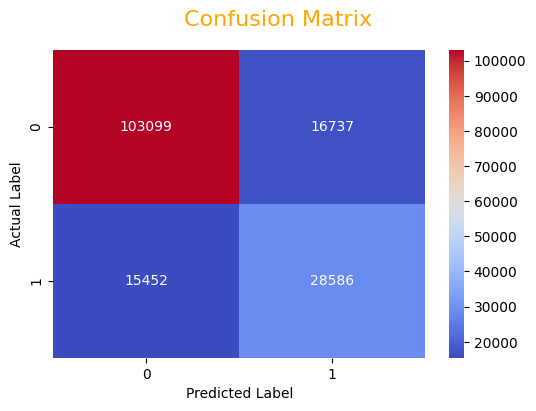

In [29]:
DT_model(X, Y)